In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
activities = pd.read_csv('ac_activities_torben_clean_v2.csv')
activities = activities[activities['type'] == 'Run'] 
activities = activities.apply(pd.to_numeric,errors="coerce")
activities.dropna()
activities.head()

,id,type,start_date_local,x_start_h,name,name_short,x_min,x_mi,x_min/mi,x_mph,...,athlete_count,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url
0,868156484,NaN,NaN,6.3,NaN,NaN,248.2,26.510,9.36,6.41,...,29,NaN,42663.3,14892,33.176906,-117.335854,NaN,NaN,0.51,NaN
1,868156415,NaN,NaN,18.8,NaN,NaN,16.1,2.023,7.95,7.55,...,30,NaN,3256.2,1300,32.720301,-117.150205,NaN,NaN,NaN,NaN
2,868156459,NaN,NaN,6.6,NaN,NaN,87.0,10.091,8.62,6.96,...,1,NaN,16240.6,5271,32.853794,-116.960111,NaN,NaN,0.85,NaN
3,868156435,NaN,NaN,7.3,NaN,NaN,88.8,11.518,7.71,7.78,...,2,NaN,18535.6,5804,32.758368,-117.242017,NaN,NaN,0.16,NaN
4,868156458,NaN,NaN,16.8,NaN,NaN,89.6,10.066,8.90,6.74,...,1,NaN,16199.8,5658,32.853570,-116.960471,NaN,NaN,0.48,NaN


In [3]:
activities["pace"] = activities["x_min/mi"]
activities.head()

,id,type,start_date_local,x_start_h,name,name_short,x_min,x_mi,x_min/mi,x_mph,...,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url,pace
0,868156484,NaN,NaN,6.3,NaN,NaN,248.2,26.510,9.36,6.41,...,NaN,42663.3,14892,33.176906,-117.335854,NaN,NaN,0.51,NaN,9.36
1,868156415,NaN,NaN,18.8,NaN,NaN,16.1,2.023,7.95,7.55,...,NaN,3256.2,1300,32.720301,-117.150205,NaN,NaN,NaN,NaN,7.95
2,868156459,NaN,NaN,6.6,NaN,NaN,87.0,10.091,8.62,6.96,...,NaN,16240.6,5271,32.853794,-116.960111,NaN,NaN,0.85,NaN,8.62
3,868156435,NaN,NaN,7.3,NaN,NaN,88.8,11.518,7.71,7.78,...,NaN,18535.6,5804,32.758368,-117.242017,NaN,NaN,0.16,NaN,7.71
4,868156458,NaN,NaN,16.8,NaN,NaN,89.6,10.066,8.90,6.74,...,NaN,16199.8,5658,32.853570,-116.960471,NaN,NaN,0.48,NaN,8.90


In [4]:
activities.head()

,id,type,start_date_local,x_start_h,name,name_short,x_min,x_mi,x_min/mi,x_mph,...,average_temp,distance,elapsed_time,start_latitude,start_longitude,timezone,x_date,x_elev_%,x_url,pace
0,868156484,NaN,NaN,6.3,NaN,NaN,248.2,26.510,9.36,6.41,...,NaN,42663.3,14892,33.176906,-117.335854,NaN,NaN,0.51,NaN,9.36
1,868156415,NaN,NaN,18.8,NaN,NaN,16.1,2.023,7.95,7.55,...,NaN,3256.2,1300,32.720301,-117.150205,NaN,NaN,NaN,NaN,7.95
2,868156459,NaN,NaN,6.6,NaN,NaN,87.0,10.091,8.62,6.96,...,NaN,16240.6,5271,32.853794,-116.960111,NaN,NaN,0.85,NaN,8.62
3,868156435,NaN,NaN,7.3,NaN,NaN,88.8,11.518,7.71,7.78,...,NaN,18535.6,5804,32.758368,-117.242017,NaN,NaN,0.16,NaN,7.71
4,868156458,NaN,NaN,16.8,NaN,NaN,89.6,10.066,8.90,6.74,...,NaN,16199.8,5658,32.853570,-116.960471,NaN,NaN,0.48,NaN,8.90


In [5]:
activities.dtypes.head(50)

id                        int64
type                    float64
start_date_local        float64
x_start_h               float64
name                    float64
name_short              float64
x_min                   float64
x_mi                    float64
x_min/mi                float64
x_mph                   float64
x_max_mph               float64
total_elevation_gain    float64
average_heartrate       float64
max_heartrate           float64
average_cadence         float64
x_nearest_city_start    float64
x_dist_start_end_km     float64
start_latlng            float64
end_latlng              float64
elev_low                float64
elev_high               float64
athlete_count             int64
average_temp            float64
distance                float64
elapsed_time              int64
start_latitude          float64
start_longitude         float64
timezone                float64
x_date                  float64
x_elev_%                float64
x_url                   float64
pace    

In [6]:
activities=activities.loc[(activities.distance.notnull()) & (activities.pace.notnull())]

In [7]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = activities["x_mi"].values.reshape(-1, 1)
y = activities["pace"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (480, 1) (480, 1)


In [8]:
activities[["x_mi","pace"]].head()

,x_mi,pace
0,26.510,9.36
1,2.023,7.95
2,10.091,8.62
3,11.518,7.71
4,10.066,8.90


Text(0, 0.5, 'pace')

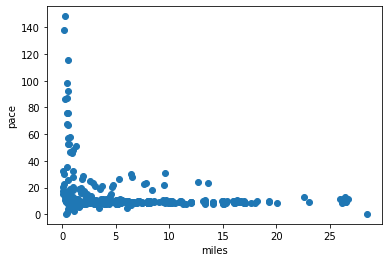

In [9]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("miles")
plt.ylabel("pace")
### END SOLUTION

In [10]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [11]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [12]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 288.3562147696441
R-squared (R2 ): 0.04804724664149407


In [14]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.04804724664149407